In [1]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)

import statistics as sts # statistic module for variance

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('Train_newColumns.csv')

In [4]:
dfnew = df.drop(columns=['Attrition','JobRole','EducationField','BusinessTravel','Department','EnvironmentSatisfaction','Education' ,'Gender','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','StockOptionLevel', 'WorkLifeBalance' ])

In [18]:
df_1 = dfnew[['MonthlyIncome', 'Stagnation', 'YearsWithCurrManager']]
df_2 = dfnew[['Stagnation', 'YearsAtCompany', 'TotalWorkingYears']]
df_3 = dfnew[['MonthlyIncome', 'TotalWorkingYears', 'Stagnation']]
df_4 = dfnew[['YearsWithCurrManager', 'TotalWorkingYears', 'TrainingTimesLastYear']]
df_5 = dfnew[['MonthlyIncome', 'YearsAtCompany', 'Stagnation']]

data_frames = [df_1, df_2, df_3, df_4, df_5]

In [19]:
#ST -YAC -TWY
df2 = dfnew.drop(columns=['Age','DistanceFromHome','NumCompaniesWorked','MonthlyIncome','PercentSalaryHike','TrainingTimesLastYear','YearsWithCurrManager'])

In [20]:
df3 = dfnew.drop(columns=['Age','DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','TrainingTimesLastYear','YearsWithCurrManager','YearsAtCompany'])

In [5]:
df5 = dfnew.drop(columns=['Age','DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','TrainingTimesLastYear','YearsWithCurrManager','TotalWorkingYears'])

In [6]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   MonthlyIncome   1013 non-null   int64
 1   YearsAtCompany  1013 non-null   int64
 2   Stagnation      1013 non-null   int64
dtypes: int64(3)
memory usage: 23.9 KB


In [7]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df5.values)

In [12]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(scaled_df, kmeans.labels_))

SSE 646.0800225345585
Silhouette 0.46350357948195453


In [11]:
kmeans = KMeans(n_clusters=6).fit(scaled_df)

In [53]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(centers)

[[2.09052759e+04 4.06896552e+00 6.00000000e+00]
 [7.12940299e+03 9.23880597e+00 5.42388060e+01]
 [6.77900000e+03 9.43750000e+00 5.01785714e+00]
 [5.13299270e+03 5.07664234e+00 5.51094891e+00]
 [4.34828519e+04 7.01851852e+00 5.70370370e+00]
 [5.36548687e+03 1.38424821e+00 9.37947494e-01]]


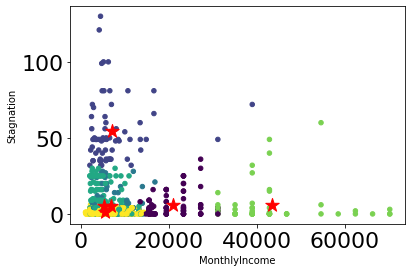

In [66]:
plt.scatter(df5['MonthlyIncome'], df5['Stagnation'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MonthlyIncome')
plt.ylabel('Stagnation')
plt.show()

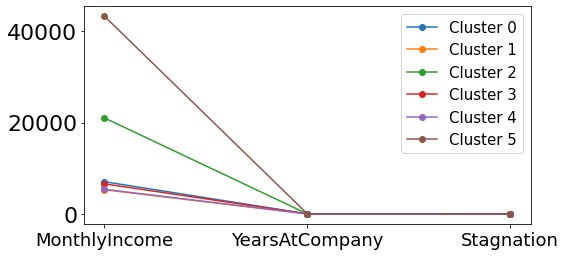

In [36]:
plt.figure(figsize=(8, 4))
col = df5.columns
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(col)), col, fontsize=18)
plt.legend(fontsize=15)
plt.show()

In [13]:
df['KmeansCluster'] = kmeans.labels_

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1013 non-null   int64 
 1   Attrition                 1013 non-null   int64 
 2   BusinessTravel            1013 non-null   object
 3   Department                1013 non-null   object
 4   DistanceFromHome          1013 non-null   int64 
 5   Education                 1013 non-null   int64 
 6   EducationField            1013 non-null   object
 7   EnvironmentSatisfaction   1013 non-null   int64 
 8   Gender                    1013 non-null   int64 
 9   JobInvolvement            1013 non-null   int64 
 10  JobRole                   1013 non-null   object
 11  JobSatisfaction           1013 non-null   int64 
 12  MaritalStatus             1013 non-null   object
 13  MonthlyIncome             1013 non-null   int64 
 14  NumCompaniesWorked      

In [ ]:
plt.scatter(df['MonthlyIncome'], df['Stagnation'], 
            s=20)

In [61]:
c = df.groupby(['KmeansCluster']).mean()

In [ ]:
#Monthlyincome
#TWY
#YAC
#YWCM
#St

In [59]:
df['KmeansCluster'].value_counts()

5    419
3    274
2    112
0     87
1     67
4     54
Name: KmeansCluster, dtype: int64

In [62]:
c.to_csv('tabella.csv', index=False)

In [63]:
c

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsWithCurrManager,Stagnation
KmeansCluster,,,,,,,,,,,,,,,,,,,,
0,37.666667,0.160920,11.252874,2.735632,2.758621,0.471264,2.747126,2.643678,20905.275862,2.390805,0.333333,15.321839,2.712644,0.873563,9.494253,2.724138,2.770115,4.068966,2.816092,6.000000
1,37.119403,0.104478,9.238806,2.761194,2.835821,0.582090,2.731343,2.895522,7129.402985,2.522388,0.313433,15.865672,2.776119,0.970149,13.940299,2.522388,2.656716,9.238806,6.865672,54.238806
2,38.312500,0.151786,7.580357,3.062500,2.607143,0.428571,2.705357,2.571429,6779.000000,2.705357,0.294643,15.223214,2.741071,0.723214,12.241071,2.714286,2.758929,9.437500,4.571429,5.017857
3,35.580292,0.138686,8.905109,2.901460,2.693431,0.383212,2.755474,2.616788,5132.992701,2.109489,0.310219,15.138686,2.726277,0.908759,9.105839,2.671533,2.740876,5.076642,2.948905,5.510949
4,37.759259,0.166667,9.166667,2.907407,2.592593,0.407407,2.925926,2.555556,43482.851852,1.462963,0.277778,15.222222,2.833333,0.611111,8.851852,2.481481,2.759259,7.018519,3.018519,5.703704
5,34.921241,0.202864,9.195704,2.770883,2.751790,0.374702,2.725537,2.809069,5365.486874,2.147971,0.262530,15.145585,2.646778,0.737470,7.190931,2.706444,2.782816,1.384248,0.959427,0.937947


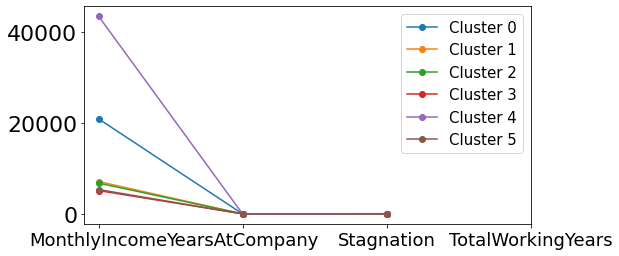

In [74]:
plt.figure(figsize=(8, 4))
col = df_6.columns
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(col)), col, fontsize=18)
plt.legend(fontsize=15)
plt.show()

In [ ]:
df.to_csv('con_kmeans_Labels.csv', index= False)